In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data =  pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
data.drop(columns=['Unnamed: 12'],axis=1,inplace=True)

In [8]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [9]:
!pip install summarytools
from summarytools import dfSummary

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for summarytools: filename=summarytools-0.2.3-py3-none-any.whl size=8572 sha256=f0132415b4978cb98ce67c505c9ae552aeb3ec04ed23a14e67f1dacc18d04068
  Stored in directory: /root/.cache/pip/wheels/d5/8a/5d/008e2127a7f9dd64d066f16e5ea268fa52823dc929c982d6f1
Successfully built summarytools


In [10]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 24.6 (3.0)min < med < max:18.0 < 24.0 < 33.0IQR (CV) : 3.0 (8.3),16 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3dMW/aQBiA4e8gJEewbBEobCwdI3WwlMU/oGN/bH9ChgydGbp0YosUIRBuLBybDlWiDGmI7+zGn/M+Myc8vMKGfLkzh8NBgLbrvfcFAG9x8t4X0FbGmKGInDou3x8Oh/s6r+ejI9QXGGOGk8nkWxiGY5f12+12bYz5Tqz1IdSXnYZhOE6S5D6KoqzKws1mY29ubsZ3d3enIkKoNSHUV0RRlM1ms98OS4e1X8wHx5cpqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKFCq//Wz6gdHrU2VEbt8FxrQxVG7fBMm0MVEUbt8FfrQ3VVFMVAREJjjMvysCzLQc2XBA+dDDVN00Ge518Wi0W/3+9XemwQEcnz3BZFcZll2bWIuHyao2adDHW/359Ya8/jOM7m8/m66vrVajVeLpfnDw8P/SauD9V1MtRHo9HI6fl2vV7zfNsy/OAPFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSo0Ol/7tPIc78tkY7uuUWoDfDY/MJeXFx8jaJo5PreXd1zi1Br5rP5RZ7nVkQur66ufkyn023V9+7ynluEWjOfzS8eN76w1uaO+22JdHTPLUJtiMvmF2x88W9864cKhAoVCBUqECpUIFSoQKhQgVChAqFCBX7wx5MaBmJ6IlI6rn11mIZQISL+B9AVRTFI0/RzEAS/er1eXnX9sWEaQu0Yj8mtMAiCWZIk26oH0Ik8zSl8iuP4Z9UZh7cM0xBqh/hObhVFcXl2dnbtc0CH6wEfcmSYhlA7pI7JrbYeWdRoqJ4P55ye56iLk1uNher7cM7peXiuyU9U59OhRdp/K8L/dTRUj9t3WJblIIqiNafnwderofrcvrl1o07HPlGdb9/culGnxn+eStPU3t7enlddt9vtrOt6n7Xv+d5ar9t3/Wazscde8wdgUH7UaSz5owAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[object],1. Male2. Female,222 (57.2%)166 (42.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABM0lEQVR4nO3bQWrDMBhE4VExodlIGIMP40P0sD2EbmOMtWhCNuqiAZ9Ao2K/7wR/wsOQ4Am1VgEOQdJd0q33ISf3qrU+eh/R2zBN01eMcex9yJmVUrYQwvfVgxtijOOyLI+U0rP3MWe07/tnznlc1/Um6dqxSVJK6TnP80/vY07s3vuA/+Cj9wG4DmKDDbHBhthgQ2ywITbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2wG6e8Fv96HnBXf7WEopWw551G84NdMKWWT9Op9R28MXjwYvEgKTPngwpPtwNOnMaZ8b8zt2mPKJ+Z2Lkz5Dvwab4w/dWFDbLAhNtgQG2yIDTbEBhtigw2xwYbYYENssCE22BAbbIgNNsQGG2KDDVM+8fldmPK9Mbdrj8HLgcFLY78KW2rfLYfn7QAAAABJRU5ErkJggg=="">",0(0.0%)
3,Marital Status[object],1. Single2. Married3. Prefer not to say,268 (69.1%)108 (27.8%)12 (3.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABn0lEQVR4nO3bQU7qYBiF4a83xFwnbQgJi2ERd7F3Ed0NIXSgxkkdOFTUqJz62+dZwZfwAinhdPM8FyT8WfoA1qOrqtuquln6ED7kcZ7n+6WP+KzNbrf71/f9dulDeN80Taeu6/63Gtym7/vt4XC4H4bhYeljuOx8Pv8dx3F7PB5vqqrN2KqqhmF42O/3d0sfw7tulz7gKzwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmU/X8X6mlD+Ftv+E12kzTdBrHcVuN/1dqDaZpOlXV49J3fJYNQlua3iB0pnyktPbJ1vQ7e+2aWle1vi5au2bWVb9hXbR2ra2rPDE3zI+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IhpZl3Vwo28ral1VevrorWzQSDGuooYDwjEXPoa9XXFt3t1ymcyxzW8mPKZzHEtl6Z8P/5nENrjAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMS+mfCZzXMurUz6TOa7BBoEYUz5ingBKvKNKwuddOgAAAABJRU5ErkJggg=="">",0(0.0%)
4,Occupation[object],1. Student2. Employee3. Self Employeed4. House wife,207 (53.4%)118 (30.4%)54 (13.9%)9 (2.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuNSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/xnp5ZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8UlEQVR4nO3bwWnjQACF4dEiQnKRMAYX4yJS7BahboyxDpuQi/awJyciOWTnyeN8XwWD+ZEZodcty1Ig4dfWB+DnEBsxXSnlqZTysPVB7sTbsiwvWx/iVvX7/f55GIbd1ge5B/M8n7uu+y24df0wDLvj8fgyjuPr1odp2eVyeZymaXc6nR5KKWJb0ZdSyjiOr4fD4c/Wh7kDT1sf4Ja5IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMX0p/z6P2fogrfMbfq2f5/k8TdOu+Dzm2+Z5PpdS3rY+x63yWfj/5bPwT3SmfKS4IBDT+t+ov62GNL2usmZqS7PrKmum9rS+rvK6piEuCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIaXbK1+KZf7qmp3ymc22xQSDGlI+Ymk82Tx2uVFtXWT7xXpV1leUTa2quq5q73VKXl7rEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiKmyrrJ8Yk21dZXlE+/ZIBBjXUXM2pPNE4kqPqyrrKKo5WpdZRVFTWvrKqsoqvBSlxixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxV+sqqyhq+rCusoqiFhsEYqyriHFBIO

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [12]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [13]:
data = pd.get_dummies(data,dtype=int)
data

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
384,23,4,12.9854,77.7081,560048,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
385,22,5,12.9850,77.5533,560010,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
386,23,2,12.9770,77.5773,560009,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1


In [15]:
features = data.columns.tolist()
features

['Age',
 'Family size',
 'latitude',
 'longitude',
 'Pin code',
 'Gender_Female',
 'Gender_Male',
 'Marital Status_Married',
 'Marital Status_Prefer not to say',
 'Marital Status_Single',
 'Occupation_Employee',
 'Occupation_House wife',
 'Occupation_Self Employeed',
 'Occupation_Student',
 'Monthly Income_10001 to 25000',
 'Monthly Income_25001 to 50000',
 'Monthly Income_Below Rs.10000',
 'Monthly Income_More than 50000',
 'Monthly Income_No Income',
 'Educational Qualifications_Graduate',
 'Educational Qualifications_Ph.D',
 'Educational Qualifications_Post Graduate',
 'Educational Qualifications_School',
 'Educational Qualifications_Uneducated',
 'Output_No',
 'Output_Yes',
 'Feedback_Negative ',
 'Feedback_Positive']

*Divide the data into bins(range).*

In [16]:
X = data[features].apply(pd.to_numeric, errors='coerce')

In [17]:
X.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1


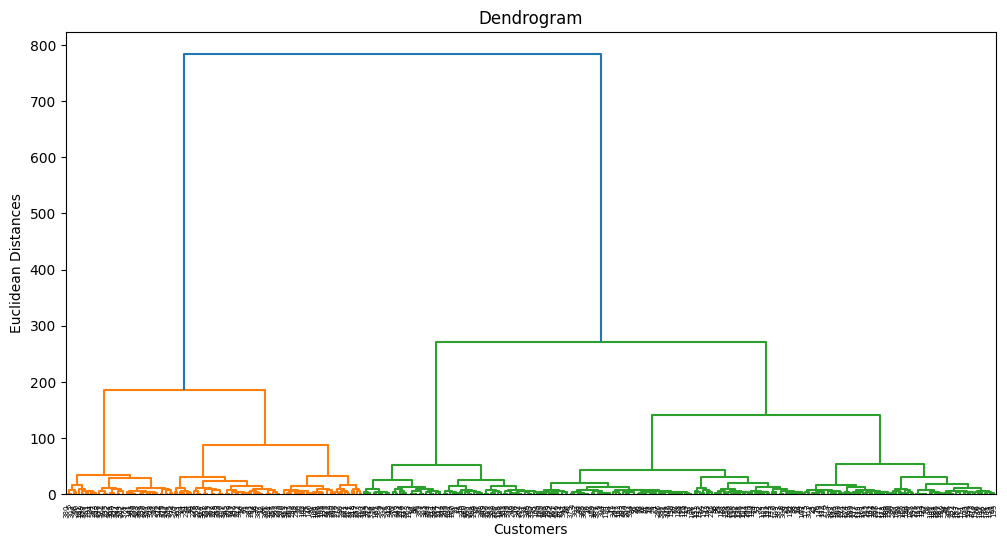

In [22]:
plt.figure(figsize=(12, 6))
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

Here we have to deal with Binary Classification, so let's take cluster value or K value as 2.

In [23]:
num_clusters = 2
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
agg_cluster.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [24]:
silhouette_avg = silhouette_score(X, agg_cluster.labels_)
print(silhouette_avg)

0.6877446571040741


In [25]:
X

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Monthly Income_No Income,Educational Qualifications_Graduate,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,0,0,1,0,0,0,1,1,0
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,2,12.9766,77.5993,560001,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
384,23,4,12.9854,77.7081,560048,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
385,22,5,12.9850,77.5533,560010,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,1
386,23,2,12.9770,77.5773,560009,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1


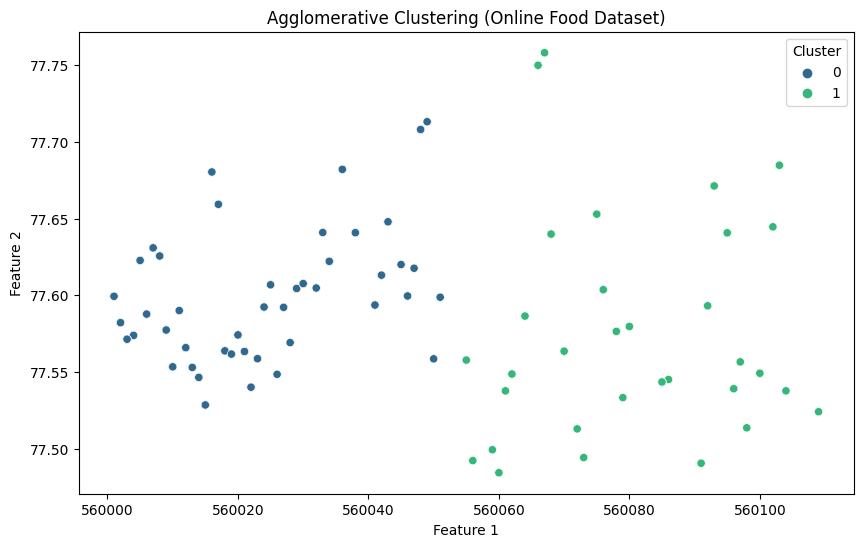

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:,4], y=X.iloc[:,3], hue=agg_cluster.labels_, palette='viridis')
plt.title('Agglomerative Clustering (Online Food Dataset)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

Clustering is doing a good job. It's well separated and makes sense.